# Capstone 2, Notebook 1
### Initial uploads, cleaning, and summary stats

This notebook is to document the initial data cleaning and summarization of the data. The initial data was compiled using a well known [api scraper, and compiler documented here](https://github.com/evolvingwild/evolving-hockey). The flat file may also be downloaded from the website [evolving-hockey](https://evolving-hockey.com), but this method was chosen to further develop more advanced api scraping and r scripting skills.  Given that that was not the focus, here the work has been done on the compiled csv files that were saved from the api and R, with only the work done in python shown.

The primary data source for that api is the official, if albeit completely undocumented and unpublished, api of National Hockey League. The files cover 10 seasons of data, but the quality is significantly lesser before the 2015 season.

In [1]:
## import working modules
import pandas as pd
import numpy as np
import glob
import os
import unicodedata
from datetime import datetime
from functools import reduce
pd.set_option('display.max_columns', None)

## import the skater files 
master_skater_all_sit = pd.read_csv("master_skater_games_all_sit_new.csv")
skaters_ev = pd.read_csv("master_skater_games_EV_new.csv")
skaters_pp = pd.read_csv("master_skater_games_PP_new.csv")
skaters_sh = pd.read_csv("master_skater_games_SH_new.csv")



Due to an anomaly in the scraping, a set of NaN values was discovered much further along in the process totally by accident. These 8 rows were an error in the scrape, and were redundant so they were removed here.

In [2]:
has_na = master_skater_all_sit.isnull().sum() 
has_na

Unnamed: 0    0
player        0
game_id       0
game_date     0
season        0
Team          0
Opponent      8
is_home       0
TOI           0
G             0
A1            0
A2            0
Points        0
iSF           0
iFF           0
iCF           0
ixG           0
iBLK          0
iHF           0
iHA           0
GIVE          0
TAKE          0
iPENT2        0
iPEND2        0
iPENT5        0
iPEND5        0
FOW           0
FOL           0
OZS           0
NZS           0
DZS           0
t_TOI         0
dtype: int64

In [3]:
master_skater_all_sit.dropna(inplace=True)
has_na = master_skater_all_sit.isnull().sum() 
has_na

Unnamed: 0    0
player        0
game_id       0
game_date     0
season        0
Team          0
Opponent      0
is_home       0
TOI           0
G             0
A1            0
A2            0
Points        0
iSF           0
iFF           0
iCF           0
ixG           0
iBLK          0
iHF           0
iHA           0
GIVE          0
TAKE          0
iPENT2        0
iPEND2        0
iPENT5        0
iPEND5        0
FOW           0
FOL           0
OZS           0
NZS           0
DZS           0
t_TOI         0
dtype: int64

In [4]:
# join all the skater files and check counts
master_pp = pd.merge(master_skater_all_sit, skaters_ev, left_on=['player','game_id', 'game_date'],right_on=['player','game_id', 'game_date'],how='outer',suffixes=('_comp','_ev'))

In [5]:
master_pp_ev = pd.merge(master_pp, skaters_pp, left_on=['player','game_id', 'game_date'],right_on=['player','game_id', 'game_date'],how='outer',suffixes=('','_pp'))

In [6]:
master_all = pd.merge(master_pp_ev, skaters_sh, left_on=['player','game_id', 'game_date'],right_on=['player','game_id', 'game_date'],how='outer',suffixes=('','_sh'))

In [7]:
master_all.head()

,Unnamed: 0_comp,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,Unnamed: 0_ev,season_ev,Team_ev,Opponent_ev,is_home_ev,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,Unnamed: 0,season,Team,Opponent,is_home,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,Unnamed: 0_sh,season_sh,Team_sh,Opponent_sh,is_home_sh,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh
0,1,A.J..GREER,2016020227,17118,20162017,COL,BOS,1,16.566667,0,0,0,0,3,3,3,0.268124,0,0,2,0,1,0,0,0,0,0,0,9,5,5,60.000000,1.0,20162017.0,COL,BOS,1.0,14.566667,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.158389,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,8.0,7.0,9.0,11.0,11.0,1.146618,0.686133,0.0,1.0,5.0,8.0,7.0,9.0,11.0,11.0,1.146618,0.686133,53.200000,0.0,1.0,18.0,39.0,27.0,46.0,38.0,57.0,6.190029,5.478644,0.0,1.0,18.0,39.0,27.0,46.0,38.0,57.0,6.190029,5.478644,1.0,20162017.0,COL,BOS,1.0,2.000000,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.109734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,0.109734,0.0,2.15,0.0,0.0,3.0,0.0,3.0,0.0,5.0,0.0,0.124246,0.000000,0.0,0.0,3.0,0.0,3.0,0.0,5.0,0.0,0.124246,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,A.J..GREER,2016020251,17122,20162017,COL,DAL,0,11.733333,0,0,0,0,1,2,2,0.648205,0,0,0,1,0,0,0,0,0,0,0,6,7,7,60.000000,2.0,20162017.0,COL,DAL,0.0,11.733333,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.648205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,1.0,14.0,5.0,16.0,0.002663,1.861744,0.0,1.0,0.0,10.0,1.0,14.0,5.0,16.0,0.002663,1.861744,47.600000,1.0,1.0,18.0,27.0,23.0,40.0,37.0,61.0,2.502032,4.276189,1.

In [8]:
print("original size: ",master_skater_all_sit.shape[0], "rows and", master_skater_all_sit.shape[1], "columns")
print("joined size: ",master_all.shape[0], "rows and", master_all.shape[1], "columns")

original size:  441586 rows and 32 columns
joined size:  441586 rows and 262 columns


In [9]:
## clearing out the chaff columns
## get the list of columns in an usable way

for col in master_all.columns: 
    print(col) 

Unnamed: 0_comp
player
game_id
game_date
season_comp
Team_comp
Opponent_comp
is_home_comp
TOI_comp
G_comp
A1_comp
A2_comp
Points_comp
iSF_comp
iFF_comp
iCF_comp
ixG_comp
iBLK_comp
iHF
iHA
GIVE
TAKE
iPENT2_comp
iPEND2_comp
iPENT5_comp
iPEND5_comp
FOW_comp
FOL_comp
OZS_comp
NZS_comp
DZS_comp
t_TOI_comp
Unnamed: 0_ev
season_ev
Team_ev
Opponent_ev
is_home_ev
TOI_ev
G_ev
A1_ev
A2_ev
Points_ev
iSF_ev
iFF_ev
iCF_ev
ixG_ev
iBLK_ev
GIVE_o
GIVE_n
GIVE_d
TAKE_o
TAKE_n
TAKE_d
iHF_o
iHF_n
iHF_d
iHA_o
iHA_n
iHA_d
FOW_ev
FOL_ev
OZS_ev
NZS_ev
DZS_ev
iPENT2_ev
iPEND2_ev
iPENT5_ev
iPEND5_ev
onGF
onGA
onSF
onSA
onFF
onFA
onCF
onCA
onxGF
onxGA
onGF_state
onGA_state
onSF_state
onSA_state
onFF_state
onFA_state
onCF_state
onCA_state
onxGF_state
onxGA_state
t_TOI_ev
t_GF
t_GA
t_SF
t_SA
t_FF
t_FA
t_CF
t_CA
t_xGF
t_xGA
t_GF_state
t_GA_state
t_SF_state
t_SA_state
t_FF_state
t_FA_state
t_CF_state
t_CA_state
t_xGF_state
t_xGA_state
Unnamed: 0
season
Team
Opponent
is_home
TOI
G
A1
A2
Points
iSF
iFF
iCF
ixG
GIVE_o_p

In [10]:
master_all.drop(['Unnamed: 0_comp', 'Unnamed: 0_ev', 'season_ev', 'Team_ev', 'Opponent_ev', 'is_home_ev', 'Unnamed: 0', 'season', 'Team', 'Opponent', 'is_home', 'Unnamed: 0_sh', 'season_sh', 'Team_sh', 'Opponent_sh', 'is_home_sh'], axis=1, inplace=True)

In [11]:
print("new size: ",master_all.shape[0], "rows and", master_all.shape[1], "columns")

new size:  441586 rows and 246 columns


In [12]:
master_all.isnull().sum() 

player                 0
game_id                0
game_date              0
season_comp            0
Team_comp              0
Opponent_comp          0
is_home_comp           0
TOI_comp               0
G_comp                 0
A1_comp                0
A2_comp                0
Points_comp            0
iSF_comp               0
iFF_comp               0
iCF_comp               0
ixG_comp               0
iBLK_comp              0
iHF                    0
iHA                    0
GIVE                   0
TAKE                   0
iPENT2_comp            0
iPEND2_comp            0
iPENT5_comp            0
iPEND5_comp            0
FOW_comp               0
FOL_comp               0
OZS_comp               0
NZS_comp               0
DZS_comp               0
                   ...  
onGA_state_sh     150429
onSF_state_sh     150429
onSA_state_sh     150429
onFF_state_sh     150429
onFA_state_sh     150429
onCF_state_sh     150429
onCA_state_sh     150429
onxGF_state_sh    150429
onxGA_state_sh    150429


All of the null values at this point I'm happy to fill in with zeros because they are simply not getting time on those kinds of shifts.  In my estimation giving them 0s is most appropriate since its not that the data is missing it's that the players are actually at zero in those metrics. 

In [13]:
master_all.fillna(0,inplace = True)
master_all.sort_values(by='t_xGA_state_sh',ascending=True)[0:14]
#has_na = master_all.isnull().sum() > 0
#has_na

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh
0,A.J..GREER,2016020227,17118,20162017,COL,BOS,1,16.566667,0,0,0,0,3,3,3,0.268124,0,0,2,0,1,0,0,0,0,0,0,9,5,5,60.000000,14.566667,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.158389,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,8.0,7.0,9.0,11.0,11.0,1.146618,0.686133,0.0,1.0,5.0,8.0,7.0,9.0,11.0,11.0,1.146618,0.686133,53.200000,0.0,1.0,18.0,39.0,27.0,46.0,38.0,57.0,6.190029,5.478644,0.0,1.0,18.0,39.0,27.0,46.0,38.0,57.0,6.190029,5.478644,2.000000,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.109734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,0.109734,0.0,2.150000,0.0,0.0,3.0,0.0,3.0,0.0,5.0,0.0,0.124246,0.0,0.0,0.0,3.0,0.0,3.0,0.0,5.0,0.0,0.124246,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261623,MARK.STUART,2008021164,14338,20082009,BOS,NYR,1,14.883333,0,0,0,0,0,0,1,0.000000,2,2,4,0,0,0,0,0,0,0,0,3,3,6,60.000000,14.283333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,5.0,7.0,7.0,9.0,0.000000,0.000000,0.0,0.0,4.0,5.0,5.0,7.0,7.0,9.0,0.000000,0.000000,52.700000,1.0,0.0,23.0,25.0,31.0,34.0,40.0,48.0,0.000000,0.000000,1.0,0.0,23.0,25.0,31.0,34.0,40.0,48.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.

For some reason the dates were converted to unix format. This segment is to fix that.

In [14]:
master_all["game_date"] =pd.to_datetime(master_all["game_date"], unit='d')
print(master_all["game_date"][1:10])

1   2016-11-17
2   2016-11-19
3   2016-11-21
4   2016-11-23
5   2017-10-24
6   2017-10-27
7   2017-10-28
8   2017-11-02
9   2017-11-04
Name: game_date, dtype: datetime64[ns]


Alright that worked well, now we repeat with the team data.

In [15]:
## import the team files 
master_team_all_sit = pd.read_csv("master_team_games_all_sit_new.csv")
teams_ev = pd.read_csv("master_team_games_EV_new.csv")
teams_pp = pd.read_csv("master_team_games_PP_new.csv")
teams_sh = pd.read_csv("master_team_games_SH_new.csv")

In [16]:
## join said files

master_team_all_sit.head()

,Unnamed: 0,Team,Opponent,game_id,game_date,season,is_home,TOI,GF,GA,G_diff,xGF,xGA,xG_diff,SF,SA,S_diff,FF,FA,F_diff,CF,CA,C_diff,PEND2,PENT2,PEND5,PENT5
0,1,ANA,S.J,2008020008,14161,20082009,0,60.0,1,4,-3,0.0,0.0,0.0,29,41,-12,30,48,-18,40,63,-23,2,7,0,0
1,2,ANA,ARI,2008020030,14164,20082009,1,60.0,2,4,-2,0.0,0.0,0.0,35,24,11,50,32,18,58,39,19,7,9,0,0
2,3,ANA,L.A,2008020042,14166,20082009,0,60.0,3,6,-3,0.0,0.0,0.0,26,23,3,36,37,-1,46,45,1,7,11,0,0
3,4,ANA,EDM,2008020048,14167,20082009,1,60.0,2,3,-1,0.0,0.0,0.0,35,28,7,49,41,8,61,47,14,2,4,0,0
4,5,ANA,S.J,2008020061,14169,20082009,1,60.0,4,0,4,0.0,0.0,0.0,20,38,-18,36,52,-16,43,59,-16,7,8,0,0


In [17]:
# join all the skater files and check counts
team_master_ev = pd.merge(master_team_all_sit, teams_ev, left_on=['Team','Opponent','game_id', 'game_date', "is_home"],right_on=['Team','Opponent','game_id', 'game_date', "is_home"],how='outer',suffixes=('_comp','_ev'))

In [18]:
team_master_pp = pd.merge(team_master_ev, teams_pp, left_on=['Team','Opponent','game_id', 'game_date', "is_home"],right_on=['Team','Opponent','game_id', 'game_date', "is_home"],how='outer',suffixes=('_comp','_pp'))

In [19]:
team_master_sh = pd.merge(team_master_pp, teams_sh, left_on=['Team','Opponent','game_id', 'game_date', "is_home"],right_on=['Team','Opponent','game_id', 'game_date', "is_home"],how='outer',suffixes=('_comp','_sh'))

In [20]:
team_master_sh.head()

,Unnamed: 0_comp,Team,Opponent,game_id,game_date,season_comp,is_home,TOI_comp,GF_comp,GA_comp,G_diff,xGF_comp,xGA_comp,xG_diff,SF_comp,SA_comp,S_diff,FF_comp,FA_comp,F_diff,CF_comp,CA_comp,C_diff,PEND2_comp,PENT2_comp,PEND5_comp,PENT5_comp,Unnamed: 0_ev,season_ev,TOI_ev,TOI_5v5,TOI_4v4,TOI_3v3,PEND2_ev,PENT2_ev,PEND5_ev,PENT5_ev,Unnamed: 0_comp,season_comp,TOI_comp,TOI_5v4,TOI_5v3,TOI_4v3,GF_pp,GA_pp,xGF_pp,xGA_pp,SF_pp,SA_pp,FF_pp,FA_pp,CF_pp,CA_pp,PEND2_comp,PENT2_comp,PEND5_comp,PENT5_comp,Unnamed: 0_sh,season_sh,TOI_sh,TOI_4v5,TOI_3v5,TOI_3v4,GF,GA,xGF,xGA,SF,SA,FF,FA,CF,CA,PEND2_sh,PENT2_sh,PEND5_sh,PENT5_sh
0,1,ANA,S.J,2008020008,14161,20082009,0,60.0,1,4,-3,0.0,0.0,0.0,29,41,-12,30,48,-18,40,63,-23,2,7,0,0,1,20082009,44.250000,44.250000,0.000000,0.0,0,6,0,0,1.0,20082009.0,4.000000,4.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.0,0.0,6.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,1.0,20082009.0,11.700000,11.350000,0.350000,0.000000,0.0,2.0,0.0,0.0,1.0,17.0,1.0,18.0,1.0,22.0,0.0,1.0,0.0,0.0
1,2,ANA,ARI,2008020030,14164,20082009,1,60.0,2,4,-2,0.0,0.0,0.0,35,24,11,50,32,18,58,39,19,7,9,0,0,2,20082009,43.383333,41.383333,2.000000,0.0,3,6,0,0,2.0,20082009.0,6.016667,6.016667,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0,0.0,8.0,1.0,10.0,1.0,1.0,1.0,0.0,0.0,2.0,20082009.0,9.883333,9.883333,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,7.0,4.0,9.0,4.0,11.0,0.0,0.0,0.0,0.0
2,3,ANA,L.A,2008020042,14166,20082009,0,60.0,3,6,-3,0.0,0.0,0.0,26,23,3,36,37,-1,46,45,1,7,11,0,0,3,20082009,38.016667,36.450000,1.566667,0.0,5,6,0,0,3.0,20082009.0,8.216667,8.216667,0.000000,0.000000,0.0,0.0,0.0,0.0,9.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,3.0,20082009.0,12.066667,9.183333,2.883333,0.000000,0.0,3.0,0.0,0.0,0.0,9.0,0.0,15.0,1.0,17.0,1.0,1.0,0.0,0.0
3,4,ANA,EDM,2008020048,14167,20082009,1,60.0,2,3,-1,0.0,0.0,0.0,35,28,7,49,41,8,61,47,14,2,4,0,0,4,20082009,51.300000,49.750000,1.550000,0.0,2,2,0,0,4.0,20082009.0,2.450000,2.450000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,4.0,20082009.0,4.783333,4.783333,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,5.0,0.0,6.0,0.0,9.0,0.0,0.0,0.0,0.0
4,5,ANA,S.J,2008020061,14169,20082009,1,60.0,4,0,4,0.0,0.0,0.0,20,38,-18,36,52,-16,43,59,-16,7,8,0,0,5,20082009,40.400000,38.333333,2.066667,0.0,5,5,0,0,5.0,20082009.0,9.183333,6.150000,1.216667,1.816667,1.0,0.0,0.0,0.0,8.0,2.0,12.0,2.0,13.0,2.0,1.0,3.0,0.0,0.0,5.0,20082009.0,10.416667,8.716667,1.033333,0.666667,0.0,0.0,0.0,0.0,1.0,13.0,2.0,19.0,2.0,23.0,1.0,0.0,0.0,0.0


In [21]:
print("original size: ",master_team_all_sit.shape[0], "rows and", master_team_all_sit.shape[1], "columns")
print("joined size: ",team_master_sh.shape[0], "rows and", team_master_sh.shape[1], "columns")


original size:  24536 rows and 27 columns
joined size:  24536 rows and 77 columns


In [22]:
team_master_sh.isnull().sum() 

Unnamed: 0_comp      0
Team                 0
Opponent             0
game_id              0
game_date            0
season_comp          0
is_home              0
TOI_comp             0
GF_comp              0
GA_comp              0
G_diff               0
xGF_comp             0
xGA_comp             0
xG_diff              0
SF_comp              0
SA_comp              0
S_diff               0
FF_comp              0
FA_comp              0
F_diff               0
CF_comp              0
CA_comp              0
C_diff               0
PEND2_comp           0
PENT2_comp           0
PEND5_comp           0
PENT5_comp           0
Unnamed: 0_ev        0
season_ev            0
TOI_ev               0
                  ... 
SF_pp              314
SA_pp              314
FF_pp              314
FA_pp              314
CF_pp              314
CA_pp              314
PEND2_comp         314
PENT2_comp         314
PEND5_comp         314
PENT5_comp         314
Unnamed: 0_sh      314
season_sh          314
TOI_sh     

In [23]:
team_master_sh.fillna(0,inplace = True)
has_na = team_master_sh.isnull().sum() > 0
has_na

Unnamed: 0_comp    False
Team               False
Opponent           False
game_id            False
game_date          False
season_comp        False
is_home            False
TOI_comp           False
GF_comp            False
GA_comp            False
G_diff             False
xGF_comp           False
xGA_comp           False
xG_diff            False
SF_comp            False
SA_comp            False
S_diff             False
FF_comp            False
FA_comp            False
F_diff             False
CF_comp            False
CA_comp            False
C_diff             False
PEND2_comp         False
PENT2_comp         False
PEND5_comp         False
PENT5_comp         False
Unnamed: 0_ev      False
season_ev          False
TOI_ev             False
                   ...  
SF_pp              False
SA_pp              False
FF_pp              False
FA_pp              False
CF_pp              False
CA_pp              False
PEND2_comp         False
PENT2_comp         False
PEND5_comp         False


Logically, this works out becuase every team should have someone that skated in each situation, this is mostly to check we didn't miss a team or inflate on a join or some such thing. I was surprised to see that there were approx 314 games in the past 10 years where one of the teams didn't have a penalty, which I spot-checked by grabbing [a random game with an NA row](https://www.espn.com/nhl/game/_/gameId/401045035) and verifying (ok, not random: these are my beloved Red Wings, who got one of their few wins in this one and created a record loosing streak for the Ducks, despite not having any power plays). I choose to take the same action as far as clean up, simply filling in with 0.

In [24]:
## writing out these files for posterity
master_all.to_csv('combined_skater_files.csv.gz', compression='gzip')
team_master_sh.to_csv('combined_team_files.csv.gz', compression='gzip')


## Summary Stats and Exploration

Now that we have two complete data sets, let's look at some of the major features that played a significant role in the last model, as well as some general points catagories

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="ticks", palette='RdBu_r', font='Roboto')
sns.set_context("paper")

sns.distplot(master_all.G_comp)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 640x480 with 1 Axes>

This actually makes it look like there might be some records with goals above 25 which is impossible, so let's look back here (the plot doesn't actually represent that but you can see the description of why at 'Revisiting the Original Data' below.

In [26]:
gamers_ = master_all[master_all['G_comp']>5]
gamers_

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh


In [27]:
gamers_

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh


This tells me that somewhere a game and possibly a few games, were loaded in a few times. Let's look at the tape. 

In [28]:
error_game = master_all[master_all['game_id']==2014030156]
error_game[0:10]

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh
13429,ALEX.PIETRANGELO,2014030156,2015-04-26,20142015,STL,MIN,0,31.200000,0,0,0,0,5,7,13,0.769971,2,0,3,0,0,0,0,0,0,0,0,20,12,5,60.0,25.900000,0.0,0.0,0.0,0.0,4.0,4.0,9.0,0.667304,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,18.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,15.0,13.0,19.0,16.0,34.0,2.299964,2.888578,0.0,1.0,8.0,15.0,13.0,19.0,16.0,34.0,2.299964,2.888578,51.5,2.0,1.0,18.0,26.0,27.0,35.0,32.0,56.0,4.127535,4.431904,2.0,1.0,18.0,26.0,27.0,35.0,32.0,56.0,4.127535,4.431904,1.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.000000,0.060821,2.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0,0.0,0.07405,0.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0,0.0,0.07405,0.0,1.183333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.006028,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.006028,0.0,2.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0,0.0,0.07405,0.000000,0.0,0.0,1.0,0.0,3.0,0.0,4.0,0.0,0.07405,0.000000
14705,ALEX.STEEN,2014030156,2015-04-26,20142015,STL,MIN,0,21.100000,0,0,0,0,2,2,5,0.349820,0,0,0,0,0,0,1,0,0,2,6,17,9,5,60.0,15.016667,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.338814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,12.0,9.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,9.0,7.0,10.0,7.0,19.0,1.705771,1.920101,1.0,1.0,5.0,9.0,7.0,10.0,7.0,19.0,1.705771,1.920101,51.5,2.0,1.0,18.0,26.0,27.0,35.0,32.0,56.0,4.127535,4.431904,2.0,1.0,18.0,26.0,27.0,35.0,32.0,56.0,4.127535,4.431904,2.816667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,0.0

considering this mess I decided a better way to catch them was to look at any game where a player had a toi > 30, which essentially never happens in NHL games. 

In [29]:
error_time = master_all[master_all['TOI_ev']>=40]
error_time.groupby("game_id").nunique()

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh
game_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [30]:
error_time.sort_values(by='TOI_ev')[0:5]

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh


## Revisiting The Original Data

So it was here that I realized that somehow a number of games were pulled into two files when I scraped the api.  I had to search the games in chunks to not crash my local machine. Unfortunately that also meant a very small number of games had made it in multiple times as I restarted. I then had to go back to square one with my R file, created a sql style rank over partition and cleaned the files. Then I exported them to the flat files you see here.

Because of that cleanup, re-running the notebook above won't show the errors that I encountered, but contextually I wanted to document some of it.

To check that I had it sorted I thought I'd again see what the results looked like by Time on ice. 

In [241]:
master_all.sort_values(by='TOI_comp',ascending=False)[0:5]

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh
3328,ADAM.LARSSON,2016030245,2017-05-05,20162017,EDM,ANA,0,41.866667,0,0,0,0,1,1,2,0.489583,4,2,2,1,2,0,0,0,0,0,0,10,16,22,80.000000,35.450000,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.489583,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,9.0,16.0,17.0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,18.0,31.0,31.0,41.0,35.0,5.140963,5.684947,0.0,1.0,25.0,18.0,31.0,31.0,41.0,35.0,5.140963,5.684947,65.700000,0.0,2.0,46.0,34.0,58.0,54.0,70.0,62.0,9.608311,8.420466,0.0,2.0,46.0,34.0,58.0,54.0,70.0,62.0,9.608311,8.420466,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,8.000000,0.0,0.0,8.0,1.0,12.0,1.0,18.0,1.0,0.825503,3.540434e-08,0.0,0.0,8.0,1.0,12.0,1.0,18.0,1.0,0.825503,3.540434e-08,5.233333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,9.0,1.0,14.0,1.0,0.560731,3.540434e-08,0.0,0.0,5.0,1.0,9.0,1.0,14.0,1.0,0.560731,3.540434e-08,8.000000,0.0,0.0,8.0,1.0,12.0,1.0,18.0,1.0,0.825503,3.540434e-08,0.0,0.0,8.0,1.0,12.0,1.0,18.0,1.0,0.825503,3.540434e-08
370019,RYAN.SUTER,2012030151,2013-04-30,20122013,MIN,CHI,0,41.133333,0,0,0,0,0,1,3,0.006509,4,2,4,1,2,0,0,0,0,0,0,15,14,16,76.583333,32.466667,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.006509,4.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,9.0,12.0,11.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0,9.0,23.0,14.0,30.0,18.0,2.404993,1.319633,1.0,0.0,19.0,9.0,23.0,14.0,30.0,18.0,2.404993,1.319633,64.400000,1.0,1.0,31.0,20.0,38.0,29.0,57.0,34.0,3.315320,6.215979,1.0,1.0,31.0,20.0,38.0,29.0,57.0,34.0,3.315320,6.215979,5.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

I checked the first few games, [Suter's 41 minutes](https://www.hockey-reference.com/boxscores/201304300CHI.html) and [Burns' 39 minutes](https://www.hockey-reference.com/boxscores/201904230SJS.html), both of which were long playoff games with overtime periods so it makes sense that they would have significant additional time; esssentially any game in May or June is a playoff game with that dynamic possible so it's not unprecidented. 

## Additional Exploration and Initial Feature Creation 

From here I wanted to explore both the values that popped in the last project and a few others. First I needed to create a global fantasy points value. This time the scoring is based on DraftKing's system since that's what we're trying to forecast successfully. First we need a hat trick column again, and a total calucluator. Note: since we don't have shootout goals saved on the flat file, we're not including that in the calcuator.  That said, shoot outs are rare events (something like 11% according to [a Toronto Sun article last year](https://torontosun.com/sports/hockey/nhl/3-on-3-ot-the-nhl-has-found-the-sweet-spot-and-were-all-better-for-it)) in which a tiny number of players even participate so trying to game the system for that extra .2 points would in effect be more trouble than it's worth.

In [32]:
master_all['hat_trick'] = np.where(master_all['G_comp']>=3, '1', '0')
master_all['hat_trick'] = master_all['hat_trick'].astype(float)

In [10]:
master_all.sort_values(by=['G_comp','hat_trick'],ascending=False)[0:5]

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh,hat_trick
201163,JOHAN.FRANZEN,2010020764,15007,20102011,DET,OTT,0,18.466667,5,0,0,5,10,10,11,1.776873,0,0,0,0,0,0,0,0,0,0,0,5,9,4,60.0,15.816667,2.0,0.0,0.0,2.0,7.0,7.0,8.0,0.301185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,4.0,0.0,0.0,0.0,0.0,1.0,3.0,9.0,13.0,11.0,15.0,13.0,19.0,0.842412,2.387924,1.0,3.0,9.0,13.0,11.0,15.0,13.0,19.0,0.842412,2.387924,52.700000,4.0,4.0,32.0,29.0,41.0,35.0,51.0,46.0,6.538336,5.438962,4.0,4.0,32.0,29.0,41.0,35.0,51.0,46.0,6.538336,5.438962,2.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,5.0,0.0,7.0,0.0,5.0,0.0,2.0,0.0,3.0,0.0,5.0,0.0,7.0,0.000000,5.936879e-01,2.716667,1.0,0.0,2.0,0.0,3.0,0.0,3.0,0.0,0.308064,0.000000,1.0,0.0,2.0,0.0,3.0,0.0,3.0,0.0,0.308064,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0
335400,PATRIK.LAINE,2018020354,17859,20182019,WPG,STL,0,18.716667,5,0,0,5,5,6,8,0.906454,1,1,0,0,1,0,0,0,0,0,1,14,5,5,60.0,13.350000,4.0,0.0,0.0,4.0,4.0,4.0,4.0,0.694913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0,5.0,3.0,0.0,0.0,0.0,0.0,2.0,4.0,7.0,10.0,10.0,16.0,13.0,16.0,1.167819,1.867475,2.0,4.0,7.0,10.0,10.0,16.0,13.0,16.0,1.167819,1.867475,51.033333,3.0,7.0,22.0,32.0,33.0,44.0,45.0,55.0,3.902918,6.092176,3.0,7.0,22.0,32.0,33.0,44.0,45.0,55.0,3.902918,6.092176,5.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0

In [11]:
master_all.iloc[:, 8:] = master_all.iloc[:, 8:].astype(float)

In [33]:
master_all['dk_points'] = master_all['G_comp']*3.0+master_all['A1_comp']*2.0+master_all['A2_comp']*2.0+master_all['iSF_comp']*0.5+master_all['iBLK_comp']*0.5+master_all['Points_sh']*1.0+master_all['hat_trick']*1.5
master_all.sort_values(by='dk_points',ascending=False)[0:14]

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh,hat_trick,dk_points
372736,SAM.GAGNER,2011020759,2012-02-02,20112012,EDM,CHI,1,17.466667,4,3,0,7,6,7,8,1.823879,0,0,0,0,0,0,1,0,0,7,6,10,3,2,60.0,11.950000,4.0,2.0,0.0,6.0,6.0,6.0,7.0,1.780042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,8.0,2.0,2.0,0.0,1.0,0.0,0.0,7.0,1.0,14.0,12.0,15.0,16.0,20.0,21.0,3.431942,1.520828,7.0,1.0,14.0,12.0,15.0,16.0,20.0,21.0,3.431942,1.520828,40.000000,7.0,3.0,28.0,40.0,32.0,52.0,46.0,68.0,5.580140,3.393818,7.0,3.0,28.0,40.0,32.0,52.0,46.0,68.0,5.580140,3.393818,5.516667,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.043838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,4.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,4.0,1.0,4.0,1.0,0.207434,0.000006,13.866667,1.0,1.0,13.0,3.0,18.0,4.0,23.0,4.0,1.285129,2.448752e-01,1.0,1.0,13.0,3.0,18.0,4.0,23.0,4.0,1.285129,2.448752e-01,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.0,22.5
88508,CLAUDE.GIROUX,2011030142,2012-04-13,20112012,PHI,PIT,0,22.500000,3,2,0,5,10,13,13,1.563867,1,0,0,0,0,0,0,0,0,15,14,6,9,15,60.0,15.900000,0.0,1.0,0.0,1.0,5.0,8.0,8.0,0.431444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.0,2.0,7.0,7.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,11.0,11.0,15.0,16.0,16.0,3.633179,1.257373,1.0,2.0,6.0,11.0,11.0,15.0,16.0,16.0,3.633179,1.257373,50.150000,3.0,4.0,20.0,22.0,34.0,28.0,44.0,32.0,6.969282,3.037014,3.0,4.0,20.0,22.0,34.0,28.0,44.0,32.0,6.969282,3.037014,2.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,

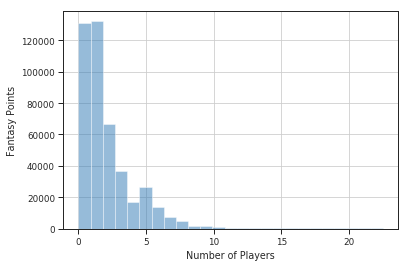

In [15]:

## here I'll map a few of the basic stats as well as essential values
fantasy_points = master_all['dk_points'].sort_values(ascending=False)
point_hist  = fantasy_points.hist( alpha=0.5, bins=25)
point_hist.plot()
plt.ylabel("Fantasy Points")
plt.xlabel("Number of Players")
plt.savefig('scoredistro.png')

In [247]:
master_all[master_all['dk_points']>=5]['player'].count()

42792

In [248]:
master_all[master_all['dk_points']>=5]['player'].count()/master_all['player'].count()

0.09690524609022931

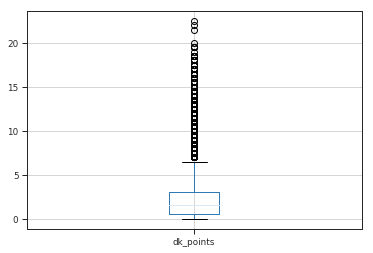

In [256]:
master_all[['dk_points']].boxplot()

What's interesting in the above is how few players clear 5 points a game, fewer than 10% of the total games. This speaks to the value of the consistant folks who are above that bar and maximizing those players on a roster. My personal historical anlysis says that you need to score about 38 points to cash in the bigger contests and 35 to cash in the double ups, so with 8 skaters 5 points plus a goalie for any number for each would scrape past that bar, but that's not a great situation to be in. 

Time on Ice was found to be very indicative in the last capstone, and the distribution there is much more normal:

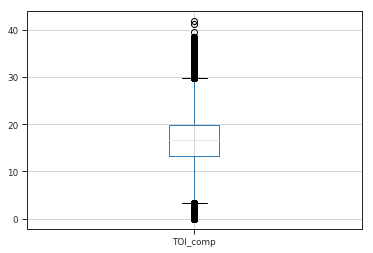

In [257]:
master_all[['TOI_comp']].boxplot()

Let's examine some Time on Ice stats, totals but we're also going to create a feature to show what percentage of a team's possible time a player is skating.  For this we can use the `t_TOI_comp` and divide the players total time by that. We can repeat this with power play and short handed features using `t_TOI` for 'Team Power Play Time on Ice" and `t_TOI_sh` for "Team Short Handed Time On Ice". 

In [34]:
master_all['skater_toi_percentage']= master_all['TOI_comp']/master_all['t_TOI_comp']
master_all['skater_pptoi_percentage']= master_all['TOI']/master_all['t_TOI']
master_all['skater_shtoi_percentage']= master_all['TOI_sh']/master_all['t_TOI_sh']

In [53]:
master_all.sort_values(by='skater_toi_percentage',ascending=True)[0:14]

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh,hat_trick,dk_points,skater_toi_percentage,skater_pptoi_percentage,skater_shtoi_percentage
407827,TOM.SESTITO,2013020695,2014-01-13,20132014,VAN,L.A,0,0.016667,0,0,0,0,0,0,0,0.0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,60.0,0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.716667,1.0,0.0,10.0,16.0,18.0,21.0,29.0,26.0,3.222970,2.249657,1.0,0.0,10.0,16.0,18.0,21.0,29.0,26.0,3.222970,2.249657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000278,NaN,NaN
234222,KRYS.BARCH,2010020770,2011-02-03,20102011,DAL,BOS,0,0.016667,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,60.0,0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.183333,5.0,2.0,24.0,17.0,36.0,25.0,45.0,32.0,4.258056,1.039549,5.0,2.0,24.0,17.0,36.0,25.0,45.0,32.0,4.258056,1.039549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In making these I noticed that there are a set of power play records that have recorded the time in error; some 5% of the rows are recorded as having more power play skating time than was available for the entire team, which doesn't make sense. I am not sure how this happened since the power play data for these records seems otherwise fine, other than an error on the end of the scorekeeper/API. 

There were also some `InF`  and `NaN` values created in this process so I filled those in as 0. 

In [17]:
master_all.fillna(0, inplace=True)
master_all.sort_values(by='skater_toi_percentage',ascending=True)[0:14]

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh,hat_trick,dk_points,skater_toi_percentage,skater_pptoi_percentage,skater_shtoi_percentage
116241,DAVID.KREJCI,2016021070,0,20162017,TOR,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
52020,BRANDON.SUTTER,2014020672,0,20142015,NYR,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Additional plots were made to explore the existing data and the relationships between the metrics and fantasy points

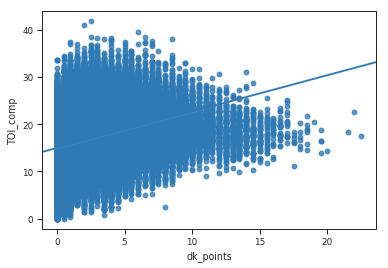

In [18]:
import warnings
warnings.filterwarnings("ignore")
sns.regplot(master_all['dk_points'],master_all['TOI_comp'])

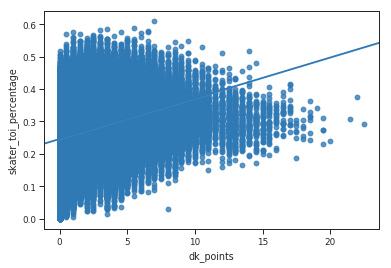

In [262]:
sns.regplot(master_all['dk_points'],master_all['skater_toi_percentage'])

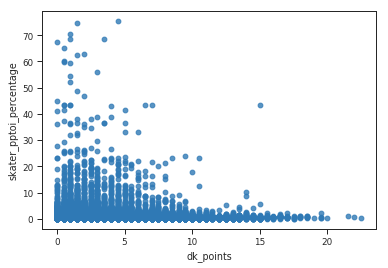

In [263]:
sns.regplot(master_all['dk_points'],master_all['skater_pptoi_percentage'])

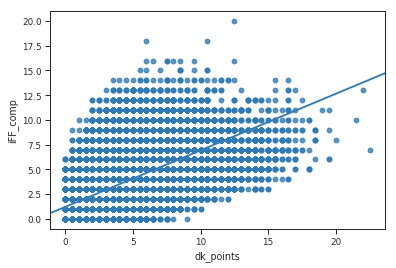

In [272]:
sns.regplot(master_all['dk_points'],master_all['iFF_comp'])

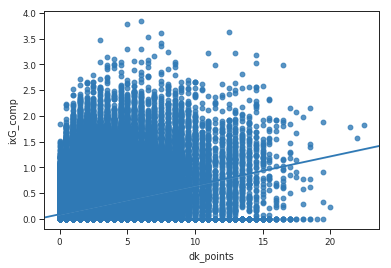

In [273]:
sns.regplot(master_all['dk_points'],master_all['ixG_comp'])

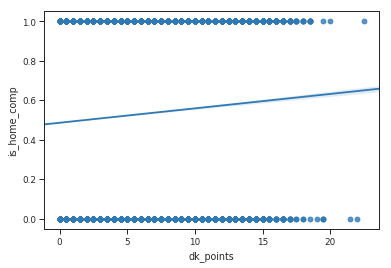

In [274]:
sns.regplot(master_all['dk_points'],master_all['is_home_comp'])

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


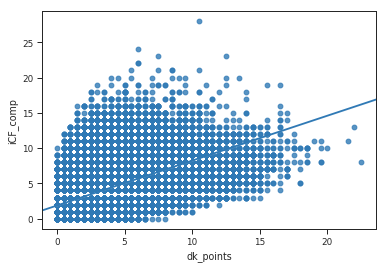

In [35]:
sns.regplot(master_all['dk_points'],master_all['iCF_comp'])

What's interesting above are how little power play time values correlate to the daily points, while time on ice over all strongly correlates. Additionally how very strongly [Fenwick](https://en.wikipedia.org/wiki/Fenwick_(statistic))  (represented here as `iFF_comp`) correlates but Expected goals (`iXG_comp`) seems to fall down. This could be because expected goals drops due to a number of older games not having the data. Finally home ice advantage does seem to be real, showing a very steady linear increase. 

Rate metrics have been shown to be useful so these are created below. The idea is that you could see how many goals per 60 minutes a player is generating, and that would show the value of that player if they were always on the ice. This is of course impossible but would also then suggest who would most benefit as their ice time changes. 

In [55]:
master_all['points_per_60']=(master_all['t_TOI_comp']/master_all['TOI_comp'])*master_all['Points_comp']
master_all['iFF_per_60']=(master_all['t_TOI_comp']/master_all['TOI_comp'])*master_all['iFF_comp']
master_all['ixG_per_60']=(master_all['t_TOI_comp']/master_all['TOI_comp'])*master_all['ixG_comp']

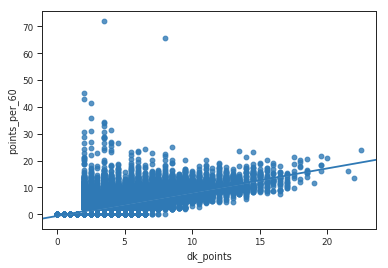

In [283]:
sns.regplot(master_all['dk_points'],master_all['points_per_60'])

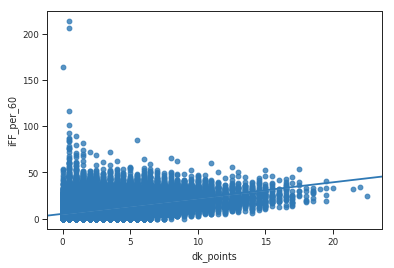

In [284]:
sns.regplot(master_all['dk_points'],master_all['iFF_per_60'])

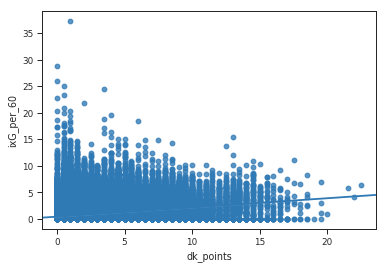

In [285]:
sns.regplot(master_all['dk_points'],master_all['ixG_per_60'])

It makes logical sense that points per 60 would correlate smoothly, but it's notable that fenwick for over 60 also has a really strong throughput value. There is certainly also some noise in the bottom of the rankings, which is likely skaters that play very limited minutes but managed to get off a shot or two, thereby simultainously spiking their intial shot/fenwick values AND their dk_points since shots are included in how draft kings points values are calculated.  There is likely a sweet spot of some kind in removing players from this calculation at some sort of minimum time on ice so as not to inflate their prospective value in the model. 

Time on ice has been seen to be a strong predictor of value across the board but in this case there is noise generated by the fact that any defense man is going to get more minutes due to the nature of the position. From here on the position data from the earlier scrape will be uploaded, joined to the base table, and the models will be split later based on position.  

In [36]:
import glob

rosters = [pd.read_csv(f,na_values = '-') for f in glob.glob('roster*')]
ros_list = pd.concat([pd.DataFrame(rosters[i]) for i in range(0,len(rosters))], ignore_index=True)


In [37]:
final_roster  = ros_list[['player','game_id', 'position','position_type','firstname','lastname']].drop_duplicates()
final_roster.head()

,player,game_id,position,position_type,firstname,lastname
0,AARON.WARD,2008020025,D,D,AARON,WARD
1,ANDREW.FERENCE,2008020025,D,D,ANDREW,FERENCE
2,BLAKE.WHEELER,2008020025,R,F,BLAKE,WHEELER
3,DAVID.KREJCI,2008020025,C,F,DAVID,KREJCI
4,DENNIS.WIDEMAN,2008020025,D,D,DENNIS,WIDEMAN


In [43]:
comp_data = pd.merge(master_all, final_roster, left_on=['player','game_id'],right_on=['player','game_id'],how='left',suffixes=('','_ros'))

In [44]:
comp_data.head()

,player,game_id,game_date,season_comp,Team_comp,Opponent_comp,is_home_comp,TOI_comp,G_comp,A1_comp,A2_comp,Points_comp,iSF_comp,iFF_comp,iCF_comp,ixG_comp,iBLK_comp,iHF,iHA,GIVE,TAKE,iPENT2_comp,iPEND2_comp,iPENT5_comp,iPEND5_comp,FOW_comp,FOL_comp,OZS_comp,NZS_comp,DZS_comp,t_TOI_comp,TOI_ev,G_ev,A1_ev,A2_ev,Points_ev,iSF_ev,iFF_ev,iCF_ev,ixG_ev,iBLK_ev,GIVE_o,GIVE_n,GIVE_d,TAKE_o,TAKE_n,TAKE_d,iHF_o,iHF_n,iHF_d,iHA_o,iHA_n,iHA_d,FOW_ev,FOL_ev,OZS_ev,NZS_ev,DZS_ev,iPENT2_ev,iPEND2_ev,iPENT5_ev,iPEND5_ev,onGF,onGA,onSF,onSA,onFF,onFA,onCF,onCA,onxGF,onxGA,onGF_state,onGA_state,onSF_state,onSA_state,onFF_state,onFA_state,onCF_state,onCA_state,onxGF_state,onxGA_state,t_TOI_ev,t_GF,t_GA,t_SF,t_SA,t_FF,t_FA,t_CF,t_CA,t_xGF,t_xGA,t_GF_state,t_GA_state,t_SF_state,t_SA_state,t_FF_state,t_FA_state,t_CF_state,t_CA_state,t_xGF_state,t_xGA_state,TOI,G,A1,A2,Points,iSF,iFF,iCF,ixG,GIVE_o_pp,GIVE_n_pp,GIVE_d_pp,TAKE_o_pp,TAKE_n_pp,TAKE_d_pp,iHF_o_pp,iHF_n_pp,iHF_d_pp,iHA_o_pp,iHA_n_pp,iHA_d_pp,FOW,FOL,OZS,NZS,DZS,iPENT2,iPEND2,iPENT5,iPEND5,onGF_pp,onGA_pp,onSF_pp,onSA_pp,onFF_pp,onFA_pp,onCF_pp,onCA_pp,onxGF_pp,onxGA_pp,onGF_state_pp,onGA_state_pp,onSF_state_pp,onSA_state_pp,onFF_state_pp,onFA_state_pp,onCF_state_pp,onCA_state_pp,onxGF_state_pp,onxGA_state_pp,t_TOI,t_GF_pp,t_GA_pp,t_SF_pp,t_SA_pp,t_FF_pp,t_FA_pp,t_CF_pp,t_CA_pp,t_xGF_pp,t_xGA_pp,t_GF_state_pp,t_GA_state_pp,t_SF_state_pp,t_SA_state_pp,t_FF_state_pp,t_FA_state_pp,t_CF_state_pp,t_CA_state_pp,t_xGF_state_pp,t_xGA_state_pp,TOI_sh,G_sh,A1_sh,A2_sh,Points_sh,iSF_sh,iFF_sh,iCF_sh,ixG_sh,iBLK,GIVE_o_sh,GIVE_n_sh,GIVE_d_sh,TAKE_o_sh,TAKE_n_sh,TAKE_d_sh,iHF_o_sh,iHF_n_sh,iHF_d_sh,iHA_o_sh,iHA_n_sh,iHA_d_sh,FOW_sh,FOL_sh,OZS_sh,NZS_sh,DZS_sh,iPENT2_sh,iPEND2_sh,iPENT5_sh,iPEND5_sh,onGF_sh,onGA_sh,onSF_sh,onSA_sh,onFF_sh,onFA_sh,onCF_sh,onCA_sh,onxGF_sh,onxGA_sh,onGF_state_sh,onGA_state_sh,onSF_state_sh,onSA_state_sh,onFF_state_sh,onFA_state_sh,onCF_state_sh,onCA_state_sh,onxGF_state_sh,onxGA_state_sh,t_TOI_sh,t_GF_sh,t_GA_sh,t_SF_sh,t_SA_sh,t_FF_sh,t_FA_sh,t_CF_sh,t_CA_sh,t_xGF_sh,t_xGA_sh,t_GF_state_sh,t_GA_state_sh,t_SF_state_sh,t_SA_state_sh,t_FF_state_sh,t_FA_state_sh,t_CF_state_sh,t_CA_state_sh,t_xGF_state_sh,t_xGA_state_sh,hat_trick,dk_points,skater_toi_percentage,skater_pptoi_percentage,skater_shtoi_percentage,position,position_type,firstname,lastname
0,A.J..GREER,2016020227,2016-11-13,20162017,COL,BOS,1,16.566667,0,0,0,0,3,3,3,0.268124,0,0,2,0,1,0,0,0,0,0,0,9,5,5,60.000000,14.566667,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.158389,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,8.0,7.0,9.0,11.0,11.0,1.146618,0.686133,0.0,1.0,5.0,8.0,7.0,9.0,11.0,11.0,1.146618,0.686133,53.200000,0.0,1.0,18.0,39.0,27.0,46.0,38.0,57.0,6.190029,5.478644,0.0,1.0,18.0,39.0,27.0,46.0,38.0,57.0,6.190029,5.478644,2.000000,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.109734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,0.109734,0.0,2.15,0.0,0.0,3.0,0.0,3.0,0.0,5.0,0.0,0.124246,0.000000,0.0,0.0,3.0,0.0,3.0,0.0,5.0,0.0,0.124246,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,1.5,0.276111,0.930233,NaN,L,F,AJ,GREER
1,A.J..GREER,2016020251,2016-11-17,20162017,COL,DAL,0,11.733333,0,0,0,0,1,2,2,0.648205,0,0,0,1,0,0,0,0,0,0,0,6,7,7,60.000000,11.733333,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.648205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,1.0,14.0,5.0,16.0,0.002663,1.861744,0.0,1.0,0.0,10.0,1.0,14.0,5.0,16.0,0.002663,1.861744,47.600000,1.0,1.0,18.0,27.0,23.0,40.0,37.0,61.0,2.502032,4.276189,1.0,1.0,18.0,27.0,23.0,40.0,37.0,61

In [23]:
comp_data.position.isnull().sum()

0

To illustrate the point above, a few quick comparisons of defensive vs offensive players.

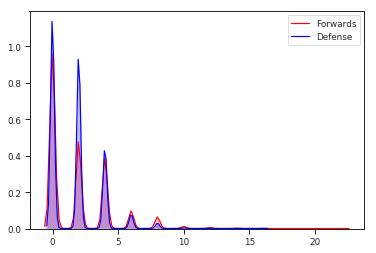

In [377]:
def myround(x, base=2):
    return base * round(x/base)
p1=sns.kdeplot(myround(comp_data['dk_points'])[comp_data['position_type']== "F"], shade=True, color="r",  label='Forwards')
p1=sns.kdeplot(myround(comp_data['dk_points'])[comp_data['position_type']== "D"], shade=True, color="b", label='Defense')

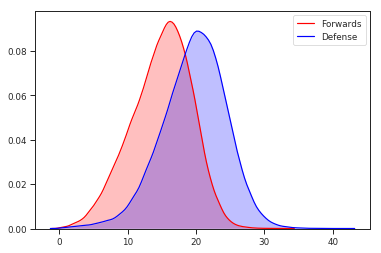

In [359]:
p1=sns.kdeplot(comp_data['TOI_comp'][comp_data['position_type']== "F"], shade=True, color="r",  label='Forwards')
p1=sns.kdeplot(comp_data['TOI_comp'][comp_data['position_type']== "D"], shade=True, color="b", label='Defense')

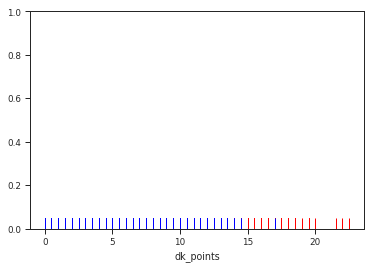

In [383]:
p1=sns.distplot(comp_data['dk_points'][comp_data['position_type']== "F"], color="r",  label='Forwards',hist = False, kde = False, rug=True,rug_kws={'color': 'r'})
p1=sns.distplot(comp_data['dk_points'][comp_data['position_type']== "D"], color="b", label='Defense',hist = False, kde = False,rug=True,rug_kws={'color': 'b'})

Shown in a slightly inelligant manner, you can see the spikes of defensive players at the `0` and `2` marks, about even around `4` and then peaks of forwards above defensemen at all stages above, with a much longer tail for forwards.

The final consideration was to create an analysis of both the count and spread of players over both total games and over periods of time.

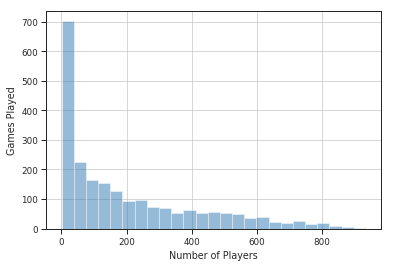

In [45]:
games_played = comp_data.groupby("player").count()


gp_hist  = games_played['game_id'].hist( alpha=0.5, bins=25)
gp_hist.plot()
plt.ylabel("Games Played")
plt.xlabel("Number of Players")
plt.savefig('gamesdistro.png')